In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from visualenvironment import VisualEnvironment
from dataset import DataObject

In [4]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

[21.  2.]
None


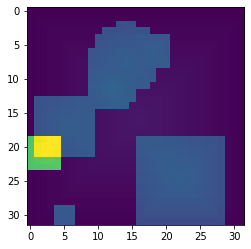

In [5]:
env1 = VisualEnvironment()
print (env1.robot_center)
print (env1.goal_center)
env1.plot_data()

[21.  2.]


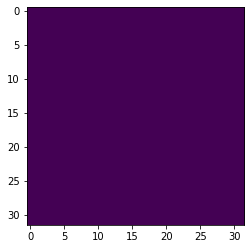

In [6]:
env2 = VisualEnvironment(includeRobot=False, addObstacles=False, grad_bg=0.0, grad_robot=0.0)
print (env1.robot_center)
env2.plot_data()

Direction [-1 -1]


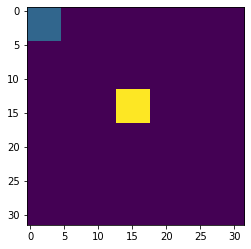

Environment 0
Control [-5. -4.]
Robot Center: [14. 15.]
Max: 191.5
Min: 0.0
Number of changing elements (50,)


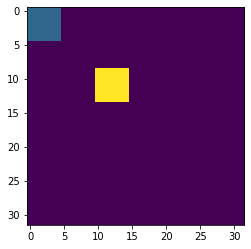

Environment 1
Control [-3. -3.]
Robot Center: [11. 12.]
Max: 191.5
Min: 0.0
Number of changing elements (50,)


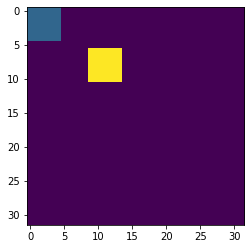

Environment 2
Control [-3. -1.]
Robot Center: [ 8. 11.]
Max: 191.5
Min: 0.0
Number of changing elements (50,)


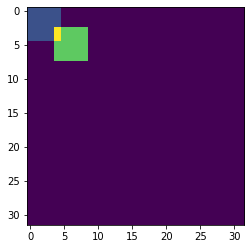

Environment 3
Control [-3. -5.]
Robot Center: [5. 6.]
Max: 255.0
Min: 0.0
Number of changing elements (48,)


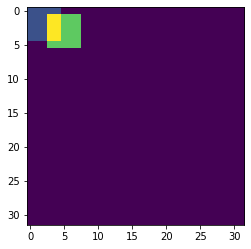

Environment 4
Control [-2. -1.]
Robot Center: [3. 5.]
Max: 255.0
Min: 0.0
Number of changing elements (42,)


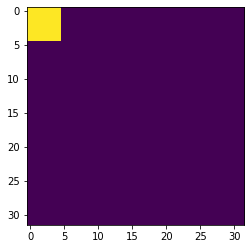

Environment 5
Control [-3. -4.]
Robot Center: [2. 2.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


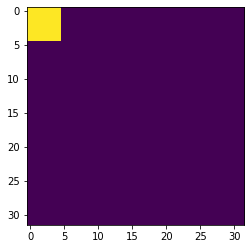

Environment 6
Control [-4. -2.]
Robot Center: [2. 2.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


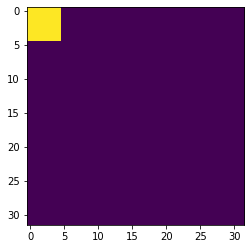

Environment 7
Control [-5. -5.]
Robot Center: [2. 2.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


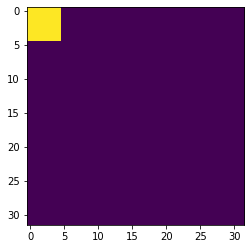

Environment 8
Control [-4. -1.]
Robot Center: [2. 2.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


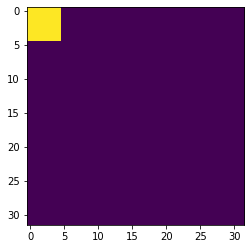

Environment 9
Control [-5. -3.]
Robot Center: [2. 2.]
Max: 255.0
Min: 0.0
Number of changing elements (25,)


In [7]:
envs, controls, direction = env2.generate_trajectory(length=10)
print ('Direction {}'.format(direction))
for i in range(len(envs)):
#     plt.subplot(3, 4, i+1)
    envs[i].build_data()
    fig = plt.figure()
    plt.imshow(envs[i].data / 255)
    plt.show()
    print ('Environment {}'.format(i))
    print ('Control {}'.format(controls[i]))
    print ('Robot Center: {}'.format(envs[i].robot_center))
    print ('Max: {}'.format(np.max(envs[i].data)))
    print ('Min: {}'.format(np.min(envs[i].data)))
    diff = envs[i].data - env2.data
    print ('Number of changing elements {}'.format(diff[diff > 0].shape))

In [20]:
print (envs[0].data)

[[  0.    0.    0.    0.    0.    0.    0.    0.   63.5  63.5  63.5  63.5
   63.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.5 191.5 191.5 191.5 191.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.   63.5  63.5  63.5  63.5
   63.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.5 191.5 191.5 191.5 191.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.   63.5  63.5  63.5  63.5
   63.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.5 191.5 191.5 191.5 191.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.   63.5  63.5  63.5  63.5
   63.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.5 191.5 191.5 191.5 191.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.   63.5  63.5  63.5  63.5
   63.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.5 191.5 191.5 191.5 191.5]
 [  0.    

In [23]:
# data sample = robot_pos (x_t), image (I_t). For now, no obstacles, later include that data as well.
def generate_robot_data(no_of_samples):
    img_size = 32*32
    x_size = 2
    sample_size = x_size + img_size
    data_samples = np.zeros((no_of_samples, sample_size))
    for i in range(no_of_samples):
        env = VisualEnvironment(addObstacles=False, grad_bg=0.0, grad_robot=0.0)
        env.build_data()
        data_samples[i, :] = np.concatenate((env.robot_center,env.data.reshape(-1)))
    return data_samples

# data sample = x_t, y_t, I_t, u_t, x_t+1, y_t+1, I_t+1
def generate_trajectory_data(no_of_trajectories):
    traj_length = 11
    x_dim = 2
    y_dim = 2
    I_dim = 32 * 32
    u_dim = 2
    total_sequence_dim = 2 * (x_dim + y_dim + I_dim) + u_dim
    data = np.zeros((no_of_trajectories*(traj_length-1), total_sequence_dim))
    for i in range(no_of_trajectories):
        empty_env = VisualEnvironment(includeRobot=False, addObstacles=False, grad_bg=0.0, grad_robot=0.0)
        envs, controls, direction = empty_env.generate_trajectory(length=traj_length)
        for j in range(traj_length):
            envs[j].build_data()
        for j in range(traj_length-1):
            do = DataObject.from_values_sequence(envs[j].robot_center.reshape(-1, 1),
                                                 envs[j].goal_center.reshape(-1, 1),
                                                 envs[j].data.reshape(-1, 1),
                                                 controls[j+1].reshape(-1, 1),
                                                 envs[j+1].robot_center.reshape(-1, 1),
                                                 envs[j+1].goal_center.reshape(-1, 1),
                                                 envs[j+1].data.reshape(-1, 1))
            data[i*(traj_length-1)+j,:] = do.rawData.reshape(1, -1)
    return data

In [25]:
seq_samples = generate_trajectory_data(3)

In [26]:
print (seq_samples.shape)

(30, 2058)


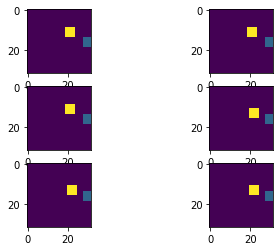

In [31]:
fig = plt.figure()
rows = 3
do = DataObject(2,2,32*32,2)
do.fill_from_array(seq_samples)
for r in range(rows):
    plt.subplot(rows,2,r*2 + 1)
    plt.imshow(do.I[r].reshape((32, 32)))
    plt.subplot(rows,2,r*2 + 2)
    plt.imshow(do.In[r].reshape((32, 32)))

In [32]:
d = DataObject(2,2,32*32,2)
d.fill_from_array(seq_samples[3, :].reshape(1, -1))
print (d.x)
print (d.y)
print (d.u)
print (d.xn)
print (d.yn)
print (d.I)
print (d.In)

[[13. 22.]]
[[16. 30.]]
[[1. 2.]]
[[14. 24.]]
[[16. 30.]]
[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.

In [8]:
data_samples = generate_robot_data(3)
print (data_samples.shape)

(3, 1026)


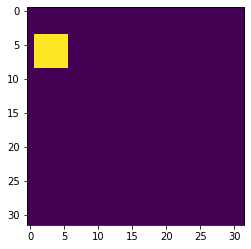

In [9]:
fig = plt.figure()
plt.imshow(data_samples[0, 2:].reshape((32, 32)))
plt.show()

In [ ]:
root_folder = 'data/img_auto_encoder/version2/'

train_samples = generate_robot_data(10000)
np.savetxt(root_folder+'train.csv', train_samples, fmt="%5.1f", delimiter=",")
print ('Training data generated')

test_samples = generate_robot_data(1000)
np.savetxt(root_folder+'test.csv', test_samples, fmt="%5.1f", delimiter=",")
print ('Test data generated')

In [10]:
np.set_printoptions(**opt)